<a href="https://colab.research.google.com/github/omerfarukpala/miuul/blob/main/divorce_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## divorce_predict

In [45]:
#import Paskages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [46]:
df=pd.read_csv("/content/sample_data/divorce_data.csv", delimiter=';')

In [47]:
df.shape

(170, 55)

In [48]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Divorce'],
      dtype='object')

In [49]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Divorce'],
      dtype='object')

In [50]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [51]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Divorce'],
      dtype='object')

In [52]:
y = df['Divorce']
X = df.drop('Divorce', axis=1)

## preprocesing

null value kontrolü yapıyorum.

In [53]:
total = df.isnull().sum().sort_values(ascending=False)
total

Q1         0
Q42        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q43        0
Q29        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Q30        0
Q28        0
Q2         0
Q14        0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q15        0
Q27        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Divorce    0
dtype: int64

veriyi normalize ediyorum

In [54]:
from sklearn import preprocessing
x = df.values #returns a numpy array
print(x)

[[2 2 4 ... 2 1 1]
 [4 4 4 ... 2 2 1]
 [2 2 2 ... 2 2 1]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 3 1 0]]


In [55]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.50,0.50,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,1.0
1,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50,1.0
2,0.50,0.50,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,...,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50,1.0
3,0.75,0.50,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,...,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50,1.0
4,0.50,0.50,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,...,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,1.00,0.25,0.25,1.00,0.50,0.50,0.50,0.0
166,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.0
167,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.75,0.00,0.50,0.00,0.25,0.25,0.75,0.00,0.00,0.0
168,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.75,0.50,0.50,0.75,0.50,1.00,0.75,0.25,0.0


## özellik mühendisliği

Önemli özellikleri seçebilir ve bir özelliğin tahminimizi ne kadar etkilediğini gözlemleyebiliriz, bunun için pearson korelasyon matrisini kullanırız.

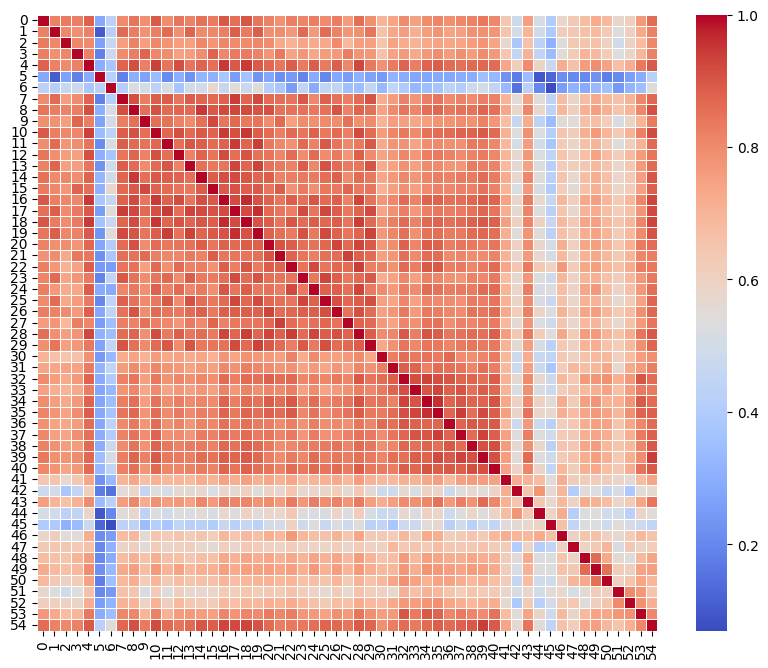

In [56]:

import matplotlib.pyplot as plt
import seaborn as sns

# load the R package ISLR
# load the Auto dataset
auto_df = df

# calculate the correlation matrix
corr = auto_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# plot the heatmap
sns.heatmap(corr, cmap="coolwarm", annot=False,
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5)

# Show the plot
plt.show()

korelasyon değerlerini görmek için

In [57]:
corr

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
1,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
2,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
3,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
4,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
5,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
6,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
7,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
8,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
9,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


daha büyük sayılar,işareti ne olursa olsun, daha fazla korelasyon anlamına gelir.

Tahmin sınıfını başka bir değişkende saklıyorum ve tablodan kaldırıyorum

In [58]:
x

array([[2, 2, 4, ..., 2, 1, 1],
       [4, 4, 4, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 2, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 1, 0],
       [0, 0, 0, ..., 3, 1, 0]])

In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Divorce, Length: 170, dtype: int64

## Veri Kümesini Eğitim ve Test Kümelerine Bölme

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print((X_train.shape))

(113, 54)


## karar ağacı

[Text(0.6666666666666666, 0.875, 'x[17] <= 1.5\ngini = 0.5\nsamples = 170\nvalue = [86, 84]'),
 Text(0.5, 0.625, 'x[25] <= 1.5\ngini = 0.065\nsamples = 89\nvalue = [86, 3]'),
 Text(0.3333333333333333, 0.375, 'x[39] <= 2.5\ngini = 0.023\nsamples = 87\nvalue = [86, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 81\nvalue = [0, 81]')]

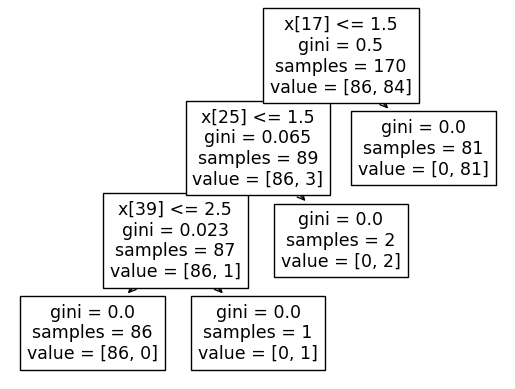

In [61]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
from sklearn import tree
tree.plot_tree(clf.fit(X,y))

In [62]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

1.0


## Training on Perceptron

In [63]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

Perceptron()

In [64]:
clf.score(X_test, y_test)

1.0

## logistic Refression

In [65]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver = "lbfgs").fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

## Neural Networks

In [66]:
import keras
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop

In [67]:
model = Sequential()
model.add(Dense(54, activation='sigmoid', input_shape=(54,)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 54)                2970      
                                                                 
 dense_5 (Dense)             (None, 128)               7040      
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14171 (55.36 KB)
Trainable params: 14171 (55.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy',
 optimizer=RMSprop(),
 metrics=['accuracy'])
model.fit(X_train,y_train,
 batch_size=16,
 epochs=100,
 verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4867
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.4867
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.4867
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.4867
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.4867
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.4867
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3792 - accuracy: 0.4867
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.4867
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.4867
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.4867
Epoch 11/100
8/8 [===========

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100,
                              max_depth=2,
                              random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [70]:
clf.score(X_test,y_test)

0.9824561403508771

Böylece, bir çiftin boşanıp boşanmayacağını tahmin etmek için farklı modelleri başarıyla eğittik.

## Diğer Değerlendirme Ölçütleri

Tüm bu ölçütler rastgele orman modeli için hesaplanmaktadır

#Confusion Matrix